In [5]:
import pandas as pd
import math
import numpy as np
import collections
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import gensim.corpora as corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pprint import pprint
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import helper_functions
%matplotlib inline
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pprint import pprint

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

# 1) Import cleaned CSV.

In [12]:
df = pd.read_csv('clean_date_df2.csv')

# 2) Preprocess and generate inputs for LDA model.
Use prepare_for_LDA in helper_functions.py.

In [ ]:
# Prepare LDA with prepare_for_LDA function
c_id2word, c_texts, c_corpus = helper_functions.prepare_for_LDA(df, 'lemm')

# 3) Feed data into LDA model.

In [7]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=c_corpus,
                                       id2word=c_id2word,
                                       num_topics=6, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# 4) Get topic coherence score and topic keywords. 
Use get_topics_coherence function from helper_functions.py. 

In [8]:
# Print the Keyword in the 6 topics
helper_functions.get_topics_coherence(lda_model, c_corpus, c_texts, c_id2word)

[(0,
  '0.018*"\'meat\'," + 0.010*"\'cell\'," + 0.009*"\'animal\'," + '
  '0.008*"\'food\'," + 0.008*"\'need\'," + 0.008*"\'cow\'," + 0.007*"\'use\'," '
  '+ 0.006*"\'much\'," + 0.006*"\'grow\'," + 0.005*"\'plant\',"'),
 (1,
  '0.009*"\'time\'," + 0.007*"\'people\'," + 0.007*"\'get\'," + '
  '0.006*"\'money\'," + 0.006*"\'like\'," + 0.006*"\'year\'," + '
  '0.006*"\'cost\'," + 0.005*"\'work\'," + 0.005*"\'price\'," + '
  '0.005*"\'comment\',"'),
 (2,
  '0.058*"[]" + 0.008*"\'chicken\'," + 0.007*"\'city\'," + 0.006*"\'prion\'," '
  '+ 0.005*"\'logic\'," + 0.005*"\'egg\'," + 0.005*"\'u\'," + 0.005*"\'1\'," + '
  '0.005*"\'america\'," + 0.004*"\'rural\',"'),
 (3,
  '0.072*"\'meat\'," + 0.019*"\'like\'," + 0.019*"\'lab\'," + '
  '0.016*"\'grown\'," + 0.014*"\'taste\'," + 0.013*"\'eat\'," + '
  '0.009*"\'burger\'," + 0.009*"\'real\'," + 0.008*"\'food\'," + '
  '0.008*"\'meat\']"'),
 (4,
  '0.015*"\'year\'," + 0.009*"\'milk\'," + 0.007*"\'diet\'," + '
  '0.007*"\'study\'," + 0.007*"\'cancer\

In [9]:
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.533112801164137


The coherence score looks at whether the topics keywords "make sense" when put together.

# 5) Append dominant topic to dataframe.
Append data generated from model, such as the dominant topic and percent contributions to the original dataframe. Use get_topic_df from helper_functions.py.


In [10]:
c_topic_df = helper_functions.get_topic_df(df, lda_model, c_corpus, c_texts)
topics_df


,Dominant_Topic,Percent_Contribution,Topic_keywords,Unnamed: 0,index,comment,date,expand,no_punct,no_stop,lemm
0,3.0,0.6476,"'meat',, 'like',, 'lab',, 'grown',, 'taste',, ...",0,0,i don’t want to die without eating some lab gr...,2020-11-09 19:22:50,i do not want to die without eating some lab g...,i do not want to die without eating some lab g...,want die without eating lab grown meat,"['want', 'die', 'without', 'eating', 'lab', 'g..."
1,0.0,0.4622,"'meat',, 'cell',, 'animal',, 'food',, 'need',,...",1,0,i can’t wait until this technology takes off. ...,2020-11-09 19:13:17,i can not wait until this technology takes off...,i can not wait until this technology takes off...,wait technology takes upgrading traditional fa...,"['wait', 'technology', 'take', 'upgrading', 't..."
2,3.0,0.7188,"'meat',, 'like',, 'lab',, 'grown',, 'taste',, ...",2,0,question: is it kosher? can they make kosher b...,2020-11-09 20:10:43,question: is it kosher? can they make kosher b...,question is it kosher can they make kosher b...,question kosher make kosher bacon method,"['question', 'kosher', 'make', 'kosher', 'baco..."
3,5.0,0.8942,"'animal',, 'people',, 'vegan',, 'think',, 'hum...",3,0,amazing! such a relief that we will soon stop ...,2020-11-09 22:57:15,amazing! such a relief that we will soon stop ...,amazing such a relief that we will soon stop ...,amazing relief soon stop treating animals way,"['amazing', 'relief', 'soon', 'stop', 'treatin..."
4,3.0,0.8078,"'meat',, 'like',, 'lab',, 'grown',, 'taste',, ...",4,0,after eating the impossible burger a few times...,2020-11-10 15:07:35,after eating the impossible burger a few times...,after eating the impossible burger a few times...,eating impossible burger times totally board f...,"['eating', 'impossible', 'burger', 'time', 'to..."
...,...,...,...,...,...,...,...,...,...,...,...
33980,0.0,0.5345,"'meat',, 'cell',, 'animal',, 'food',, 'need',,...",33980,70,"when you're dealing with a finite, non-renewab...",2015-12-10 18:01:58,"when you are dealing with a finite, non-renewa...",when you are dealing with a finite non renewa...,dealing finite non renewable resource plot ava...,"['dealing', 'finite', 'non', 'renewable', 'res..."
33981,0.0,0.4775,"'meat',, 'cell',, 'animal',, 'food',, 'need',,...",33981,70,"oh man, i am well aware of peak oil. \n\n1) no...",2015-12-10 18:12:24,"oh man, i am well aware of peak oil. 1) no, yo...",oh man i am well aware of peak oil 1 no yo...,man well aware peak oil 1 plot availability pr...,"['man', 'well', 'aware', 'peak', 'oil', '1', '..."
33982,0.0,0.4777,"'meat',, 'cell',, 'animal',, 'food',, 'need',,...",33982,70,you don't have to know how much is left in the...,2015-12-10 18:23:38,you do not have to know how much is left in th...,you do not have to know how much is left in th...,know much left crust need resource replenish l...,"['know', 'much', 'left', 'crust', 'need', 'res..."
33983,1.0,0.7019,"'time',, 'people',, 'get',, 'money',, 'like',,...",33983,70,> this drives up costs until they reach a brea...,2015-12-10 18:43:57,> this drives up costs until they reach a brea...,this drives up costs until they reach a brea...,drives costs reach breaking point afford use a...,"['drive', 'cost', 'reach', 'breaking', 'point'..."


# 6) Analyze topics by sentiment and wordclouds

For topic 0, the topic keywords are meat/cell/animal.
The sentiment score for this topic is 0.14.


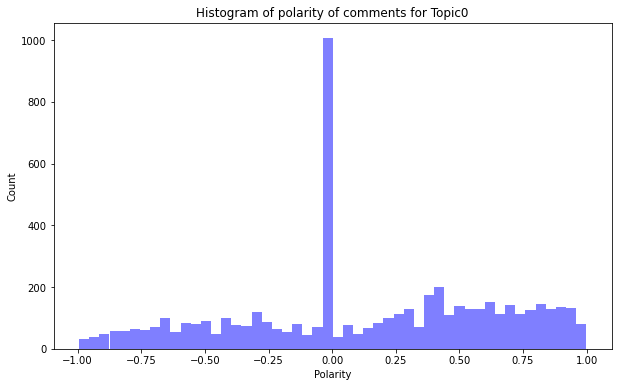

-------------------------------------------------
For topic 1, the topic keywords are people/cost/get.
The sentiment score for this topic is 0.1457.


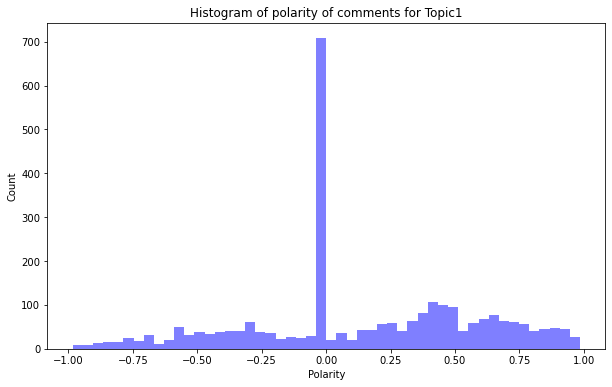

-------------------------------------------------
For topic 2, the topic keywords are pound/prion/year.
The sentiment score for this topic is 0.0145.


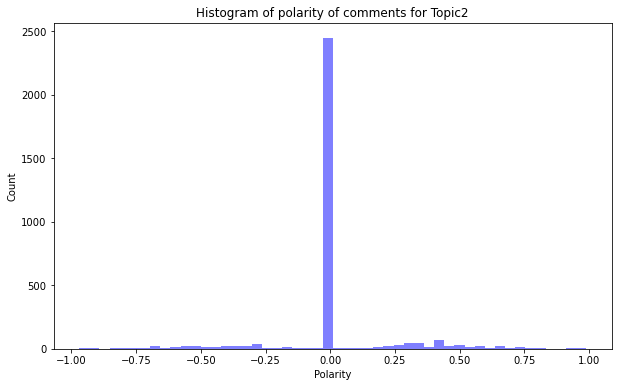

-------------------------------------------------
For topic 3, the topic keywords are meat/lab/taste.
The sentiment score for this topic is 0.1725.


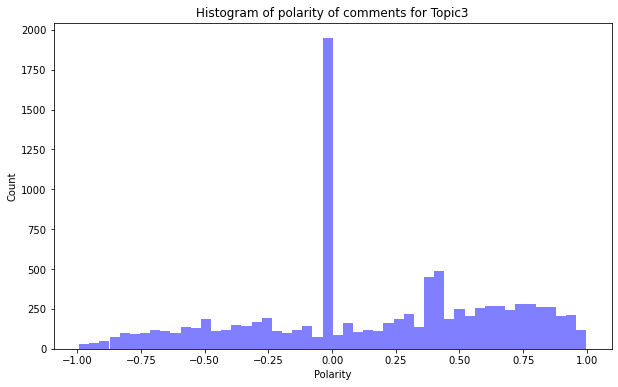

-------------------------------------------------
For topic 4, the topic keywords are year/milk/study.
The sentiment score for this topic is 0.0245.


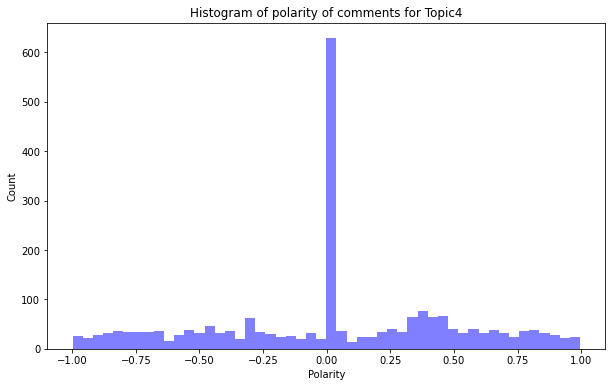

-------------------------------------------------
For topic 5, the topic keywords are animal/people/vegan.
The sentiment score for this topic is 0.001.


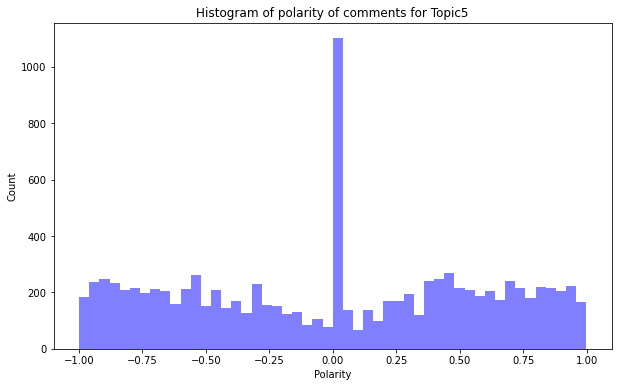

-------------------------------------------------


In [11]:
helper_functions.get_sentiment_distribution(c_topic_df, 'lab')

The overall distribution of sentiment for each of the topics were fairly neutral. 
It seems that there are very positive comments as well as very negative comments so the sentiment seems to be balanced out. The topics were decided by looking at the wordclouds and topic keywords.

## Get an idea of the distribution of comments in each topic.

In [ ]:
sid = SentimentIntensityAnalyzer()
l_topic_df['vader'] = l_topic_df['comment'].apply(lambda comment:sid.polarity_scores(comment))
l_topic_df['compound'] = l_topic_df['vader'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
#make a dictionary containing the counts of the comments
counts_dict = df['Dominant_Topic'].value_counts().to_dict()
counts_dict = collections.OrderedDict(sorted(counts_dict.items()))


In [ ]:
#make a dictionary containing the counts of the comments in each topic.
pos_comment_list = []
topic_list = []
for i in range(int(max(df['Dominant_Topic'])+1)):
    count = 0
    top_1 = df[df['Dominant_Topic'] == i]
    pos_1 = top_1[top_1['compound']>0]
    pos_comment_list.append(pos_1.shape[0])
    topic_list.append(i)
pos_counts = list(zip(topic_list, pos_comment_list))



In [ ]:
dict3 = {k: (pos[k] / counts[k]) for k in pos}
dict3


## Make a pyLDAvis to visualize topics

In [13]:
lemm = df['lemm']

In [14]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(lemm)

print(dtm_tf.shape)

(33985, 4989)


In [15]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(lemm)
print(dtm_tfidf.shape)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


(33985, 4989)


In [16]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=8, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(n_components=8, random_state=0)

In [17]:
# the pyLDAvis model gives 

In [18]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

model = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
model

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.048954  0.088833       1        1  17.271967
3      0.091540  0.161162       2        1  16.073122
6     -0.148497  0.096064       3        1  15.962095
4      0.131343  0.000043       4        1  12.588214
1     -0.085056  0.017524       5        1  11.283915
7     -0.128739 -0.073215       6        1  10.824994
2     -0.073408 -0.146713       7        1   8.922548
5      0.163863 -0.143699       8        1   7.073145, topic_info=        Term          Freq         Total Category  logprob  loglift
2777    meat  18934.000000  18934.000000  Default  30.0000  30.0000
181   animal   8943.000000   8943.000000  Default  29.0000  29.0000
2512     lab   4793.000000   4793.000000  Default  28.0000  28.0000
1990   grown   3853.000000   3853.000000  Default  27.0000  27.0000
663     cell   1894.000000   1894.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
2777    meat    647.260991  18934.654140   Topic8  -4.0941  -0.7271
181   animal    431.735999   8943.685260   Topic8  -4.4991  -0.3820
2652    long    234.079576   1314.064764   Topic8  -5.1112   0.9236
2060  health    208.745614    938.137726   Topic8  -5.2258   1.1461
760    clean    210.169486   1075.533329   Topic8  -5.2190   1.0162

[631 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
12        3  0.964447  abstain
46        6  0.962903     acid
46        7  0.024690     acid
46        8  0.012345     acid
51        4  0.982258     acre
...     ...       ...      ...
4982      3  0.980126    yummy
4986      2  0.060494   zombie
4986      3  0.922531   zombie
4986      8  0.015123   zombie
4988      2  0.993635      zoo

[1815 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 7, 5, 2, 8, 3, 6])